<a href="https://colab.research.google.com/github/vinny380/How-to-extract-text-from-PDF-with-Python/blob/main/How_to_extract_text_from_PDF_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

By: Vinícius Porfirio Purgato<br>
<img src=https://icon-library.com/images/github-icon-svg/github-icon-svg-16.jpg width=50><a href=https://github.com/vinny380>GitHub</a><br>
<img src=https://image.flaticon.com/icons/png/512/174/174857.png width=45><a href=https://www.linkedin.com/in/vin%C3%ADcius-porfirio-purgato-7891401b3/>  LinkedIn</a>

<img src=https://cdn4.iconfinder.com/data/icons/social-media-2210/24/Medium-512.png width=50>
<a href=https://medium.com/me/stories/public>Medium</a>

#How to extract text from PDF with Python


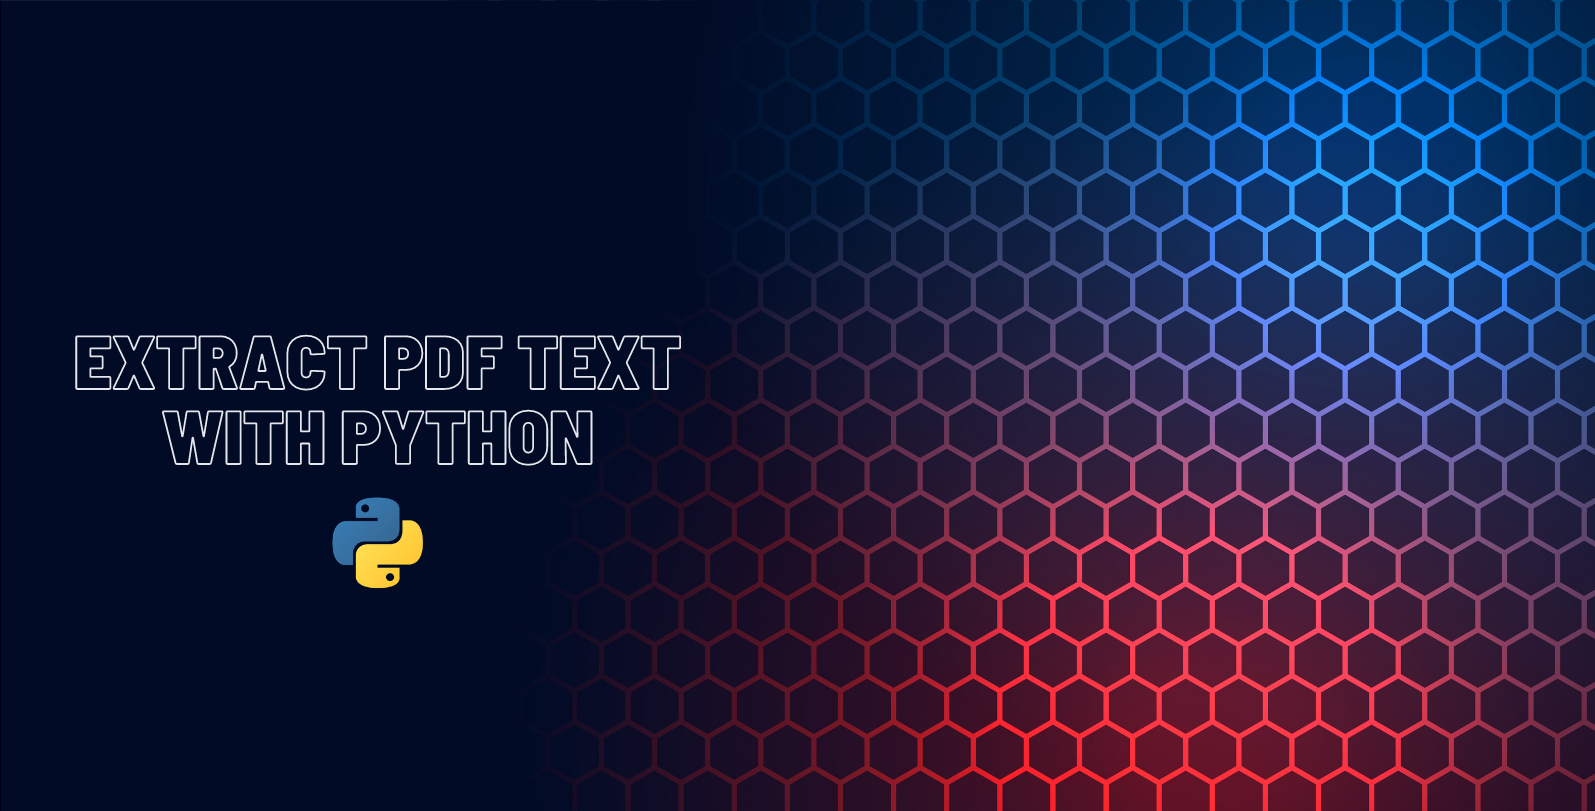
---



##Introduction

Data Scientists often have to deal with information contained in PDF's, although some of them will just copy and paste the data they need, this is a terrible practice, not to say the slowest and least effective way to work in the longterm  and depending on the PDF it may not even be possible to do it.
By using <a href=https://github.com/jsvine/pdfplumber>PDF Plumber</a> everything PDF related will become easier and smoother.<br>
<br>

Before we start I want to thanks <a href=https://www.instagram.com/carlos_melo.py/>Carlos Melo - Sigmoidal</a> for allowing me to use the reports he create in his Data Science course, in which I am a student and I love it. If you don't know him I highly encourage you to take a look at his <a href=https://sigmoidal.ai/blog-sigmoidal/>blog</a>, it is my favourite source of Data Science knowledge. Also make sure to subscribe to his <a href='https://www.youtube.com/watch?v=s_t8LSDvJvg&t=483s'>YouTube channel</a> and add him on <a href=https://www.linkedin.com/in/carlosfab/>LinkedIn</a>, trust me you won't regret. 
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

<br>
Even though Google Colab has the vast majority of the data science tools, it doesn't have this one, we will need to install it first.

Let's use ``install``, remember that to use terminal commands in the Colab you need to add a ``!``

##Installing and Importing Packages

In [ ]:
!pip install pdfplumber -q

     |████████████████████████████████| 51kB 2.7MB/s 
     |████████████████████████████████| 5.6MB 7.0MB/s 
     |████████████████████████████████| 143kB 40.9MB/s 
     |████████████████████████████████| 13.7MB 290kB/s 


Let's  import our libraries, here's each one's use:<br>
``PDF Plumber``: Extracts text from PDF files<br>
``OS``: Changes/create directories<br>
``Drive``: Connects to your Google Drive<br>
Yes, you need to connect to your Google Drive, it's just easier to have your files always saved there, once Colab doesn't save files in each notebook, they are always deleted.

In [ ]:
#importing libraries
import pdfplumber
from google.colab import drive
import os

##Mounting Google Drive

Now we mount our Google Drive, once you do this on your own, it will ask for a key to access your account just copy and paste it.

In [ ]:
#mounting drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Now we will access the folder with our files, it's public so you can use the following link to make a copy to your account: https://drive.google.com/drive/folders/1kzpPatP5OqZJUAEJNCDf1dFwUP9515Rg<br>
As you enter one of the files, you will realize they follow a pattern, the information we want to extract is the billing of that day which is referenced as Receita:R$537,00 in one of the examples. <br>
Shall we start?

##1. Chose a Random File

The files follow a pattern, just chose one of them, we will automatize the process to all of them later.<br>
<br>
Before we start, let's change to the directory were all the billing reports are by using ``os.chdir('path/to/directory')``.<br>

You can verify whether you are in the right directory or not by using ``os.getcwd()``.

To get the path to a file click on the folder icon in the left sidebar, then navigate to the file, right click and copy path.


In [ ]:
os.chdir("/content/gdrive/MyDrive/Colab Notebooks/Sigmoidal - PDZ/Módulo 2/Aula do PDF/Company Report") #changing to the directory qith the reports
os.getcwd()

'/content/gdrive/MyDrive/Colab Notebooks/Sigmoidal - PDZ/Módulo 2/Aula do PDF/Company Report'

Now we create a variable called ``week_file``, we will use it to automatize the process later, basically what it does is that it contains all the reports.

The ``os.listdir()`` function returns to us all the files in a given directory.

In [ ]:
week_files = os.listdir() #setting week_files as all the pdf's inside our directory
print(week_files) #printing the os.listdir()

['20200802.pdf', '20200801.pdf', '20200803.pdf', '20200804.pdf', '20200805.pdf']


###pdfplumber.open()
Now let's start working on our PDF.<br>
We chose a random file from the five that our folder contains, because they all follow a pattern.
Let's associate a file to the value ``pdf``, so we can access it later.<br>
<br>
The command ``pdfplumber.open('path/to/the/file')`` will take us to the file.

In [ ]:
pdf = pdfplumber.open('/content/gdrive/MyDrive/Colab Notebooks/Sigmoidal - PDZ/Módulo 2/Aula do PDF/Company Report/20200801.pdf')

###.pages

we use ``.pages`` to acces the pages of the PDF, and we pass the page number as the argument<br>
Python starts to count from 0, so the first page index is 0, not 1.

In [ ]:
pdf.pages

# associate a variable to the first page
page = pdf.pages[0]

##2. Extracting The Text

###.extract_text()
That's the function that extracts the text from our file, let's associate it to ``text`` and check out what it returns to us.

In [ ]:
# extracting the text
text = page.extract_text()

#checking out what the variable text contains now
text

'SIGMOIDAL\t\n\t \t\nRelatório\tDiário\t\nData:\t01/08/2020\t\n\t\n\t\nRECEITA:\tR$\t1297.00\t\nDADOS\tATUALIZADOS\tPOR\tCARLOS\tMELO\t\n\t\n\t\nVisitantes:\t1367\t\nA\tquantidade\tde\tvisitantes\tdiz\trespeito\ta\tvisitantes\túnicos\tvisitando\tqualquer\t\npágina\tdo\tdomínio\tou\tsubdomínio\tsigmoidal.ai.\tCompreende,\tentão,\tcursos,\t\nblogs\te\tlanding\tpages.\t\n\t\nInscritos:\t33\t\nÉ\tconsiderado\taqui\to\tnúmero\tde\tleads\tgerados\tpor\tmeio\tde\tcadastro\t\nvoluntário\tnos\tformulários\tdo\tcabeçalho,\trodapé\tou\tmateriais\tricos\t(como\t\neBook,\tinfográficos,\tentre\toutros).\t\n\t\nAssinantes:\t6\t\nClientes\tassinantes\tda\tEscola\tde\tData\tScience,\tconsiderando-se\to\tplano\t\nrenovável\tde\tassinatura\tmensal.\t\n\t'

The output you see above is the extracted text, however it is pretty messy, right?
There is a better way to visualize it.<br>
Let's use the ``print()``function, since it will read `\n` as a line breaker and ``\t`` as tab.

In [ ]:
#printing our variable
print(text)

SIGMOIDAL	
	 	
Relatório	Diário	
Data:	01/08/2020	
	
	
RECEITA:	R$	1297.00	
DADOS	ATUALIZADOS	POR	CARLOS	MELO	
	
	
Visitantes:	1367	
A	quantidade	de	visitantes	diz	respeito	a	visitantes	únicos	visitando	qualquer	
página	do	domínio	ou	subdomínio	sigmoidal.ai.	Compreende,	então,	cursos,	
blogs	e	landing	pages.	
	
Inscritos:	33	
É	considerado	aqui	o	número	de	leads	gerados	por	meio	de	cadastro	
voluntário	nos	formulários	do	cabeçalho,	rodapé	ou	materiais	ricos	(como	
eBook,	infográficos,	entre	outros).	
	
Assinantes:	6	
Clientes	assinantes	da	Escola	de	Data	Science,	considerando-se	o	plano	
renovável	de	assinatura	mensal.	
	


Way better, right?
We can even see the information we want to extract ``1297.00``.<br>
Now, let's use ``.split()`` to separate our text from the given parameter that we pass.

##3. Cleaning Our Output

In [ ]:
text.split('\n')

['SIGMOIDAL\t',
 '\t \t',
 'Relatório\tDiário\t',
 'Data:\t01/08/2020\t',
 '\t',
 '\t',
 'RECEITA:\tR$\t1297.00\t',
 'DADOS\tATUALIZADOS\tPOR\tCARLOS\tMELO\t',
 '\t',
 '\t',
 'Visitantes:\t1367\t',
 'A\tquantidade\tde\tvisitantes\tdiz\trespeito\ta\tvisitantes\túnicos\tvisitando\tqualquer\t',
 'página\tdo\tdomínio\tou\tsubdomínio\tsigmoidal.ai.\tCompreende,\tentão,\tcursos,\t',
 'blogs\te\tlanding\tpages.\t',
 '\t',
 'Inscritos:\t33\t',
 'É\tconsiderado\taqui\to\tnúmero\tde\tleads\tgerados\tpor\tmeio\tde\tcadastro\t',
 'voluntário\tnos\tformulários\tdo\tcabeçalho,\trodapé\tou\tmateriais\tricos\t(como\t',
 'eBook,\tinfográficos,\tentre\toutros).\t',
 '\t',
 'Assinantes:\t6\t',
 'Clientes\tassinantes\tda\tEscola\tde\tData\tScience,\tconsiderando-se\to\tplano\t',
 'renovável\tde\tassinatura\tmensal.\t',
 '\t']

We want the profit, which is the 7th line, so its index is 6

In [ ]:
text.split('\n')[6]

'RECEITA:\tR$\t1297.00\t'

Now, we want to get rid of R$, we want just the numerical part of the string.<br>
Use ``.replace('old parameter', 'new parameter')``

In [ ]:
text.split('\n')[6].replace('\t', '')

'RECEITA:R$1297.00'

Now let's separate the numerical part from the text.<br>
We will use ``.split()`` it will separate the text from the parameter we pass.

In [ ]:
text.split('\n')[6].replace('\t', '').split('R$')

['RECEITA:', '1297.00']

Does this output look familiar? It's a list!<br>
We want just the second element, so we pass the index 1.

In [ ]:
text.split('\n')[6].replace('\t', '').split('R$')[1]

'1297.00'

Even though it's a number, this is a string type, not a numerical value, let's transform it into a float.

In [ ]:
float(text.split('\n')[6].replace('\t', '').split('R$')[1])

1297.0

There we go!<br>
By the way, this could all be done in one line ``float(text.split('\n')[6].replace('\t', '').split('R$')[1])`` I just wanted to show you each step.<br>
<br>

Great, we extracted our value, but you wouldn't want to do this for each file, would you? <br>Of course not, and that's why we automatize this process.

##4. Automatizing The Process

Alright, so our code worked, now we need to make it do the whole process in all the reports by itself, in order to do that we will use a for loop.

Remember we associated ``week_files`` to the directory with all of them?<br>
Exactly, so now we are saying that for each file in this directory, do something.

In [ ]:
sum = 0 #make a counter

#making the function
for reports in week_files:
  report = pdfplumber.open(reports) #it will open each file in the directory
  page = report.pages[0] #selecting the first page
  text = page.extract_text() #extracting the text
  value = float(text.split("\n")[6].replace("\t", "").split("R$")[1])#cleaning our output
  sum += value 
  print("{} ----> {}".format(reports, value)) #prints the file name and the its profit value

print('The total profit was: {}'.format(sum)) #prints the sum of all the profits


20200802.pdf ----> 537.0
20200801.pdf ----> 1297.0
20200803.pdf ----> 554.0
20200804.pdf ----> 2554.0
20200805.pdf ----> 154.0
The total profit was: 5096.0


There it is. Now we got all the profits from all the files.<br>
You might be asking yourself "What is that sum variable?" basically I set it to 0, and then ``sum += value`` means that ``sum`` is equal to ``sum + value``, and ``value`` contains all the profits, so it is the sum of all the of them.

##Epilogue

In this tutorial you learned how to:<br>

1.   Connect to your Google Drive
2.   Use PDF Plumber basic functions
3.   Use the basics of OS

I hope you liked it, if you have any questions feel free to contact me on 
<a href=https://www.linkedin.com/in/vin%C3%ADcius-porfirio-purgato-7891401b3/>Linkedin</a> or <a href=https://github.com/vinny380>GitHub.</a>

